In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv('CSV/salary.csv')

In [4]:
data = data.dropna()
print(data.head())

    salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
0  53000.0        0            0          0    1.17       1          0   
1  58000.0        1            0          0    1.24       1          0   
2  45500.0        0            0          0    1.21       1          0   
3  35782.0        0            2          1    0.99       1          0   
4  34731.0        0            2          2    0.91       1          0   

   position  male  Field  yearsabs  
0         1     1      3         0  
1         1     1      2         0  
2         1     1      3         2  
3         1     1      4         1  
4         1     1      4         1  


In [4]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,50863.220098,2.931774,12.836257,7.046784,0.948558,0.964912,0.044834,2.130604,0.750487,2.526316,6.994152
std,12685.132358,4.794327,9.447040,6.419708,0.149524,0.184181,0.207142,0.819977,0.433153,1.126644,16.887552
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,1.000000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


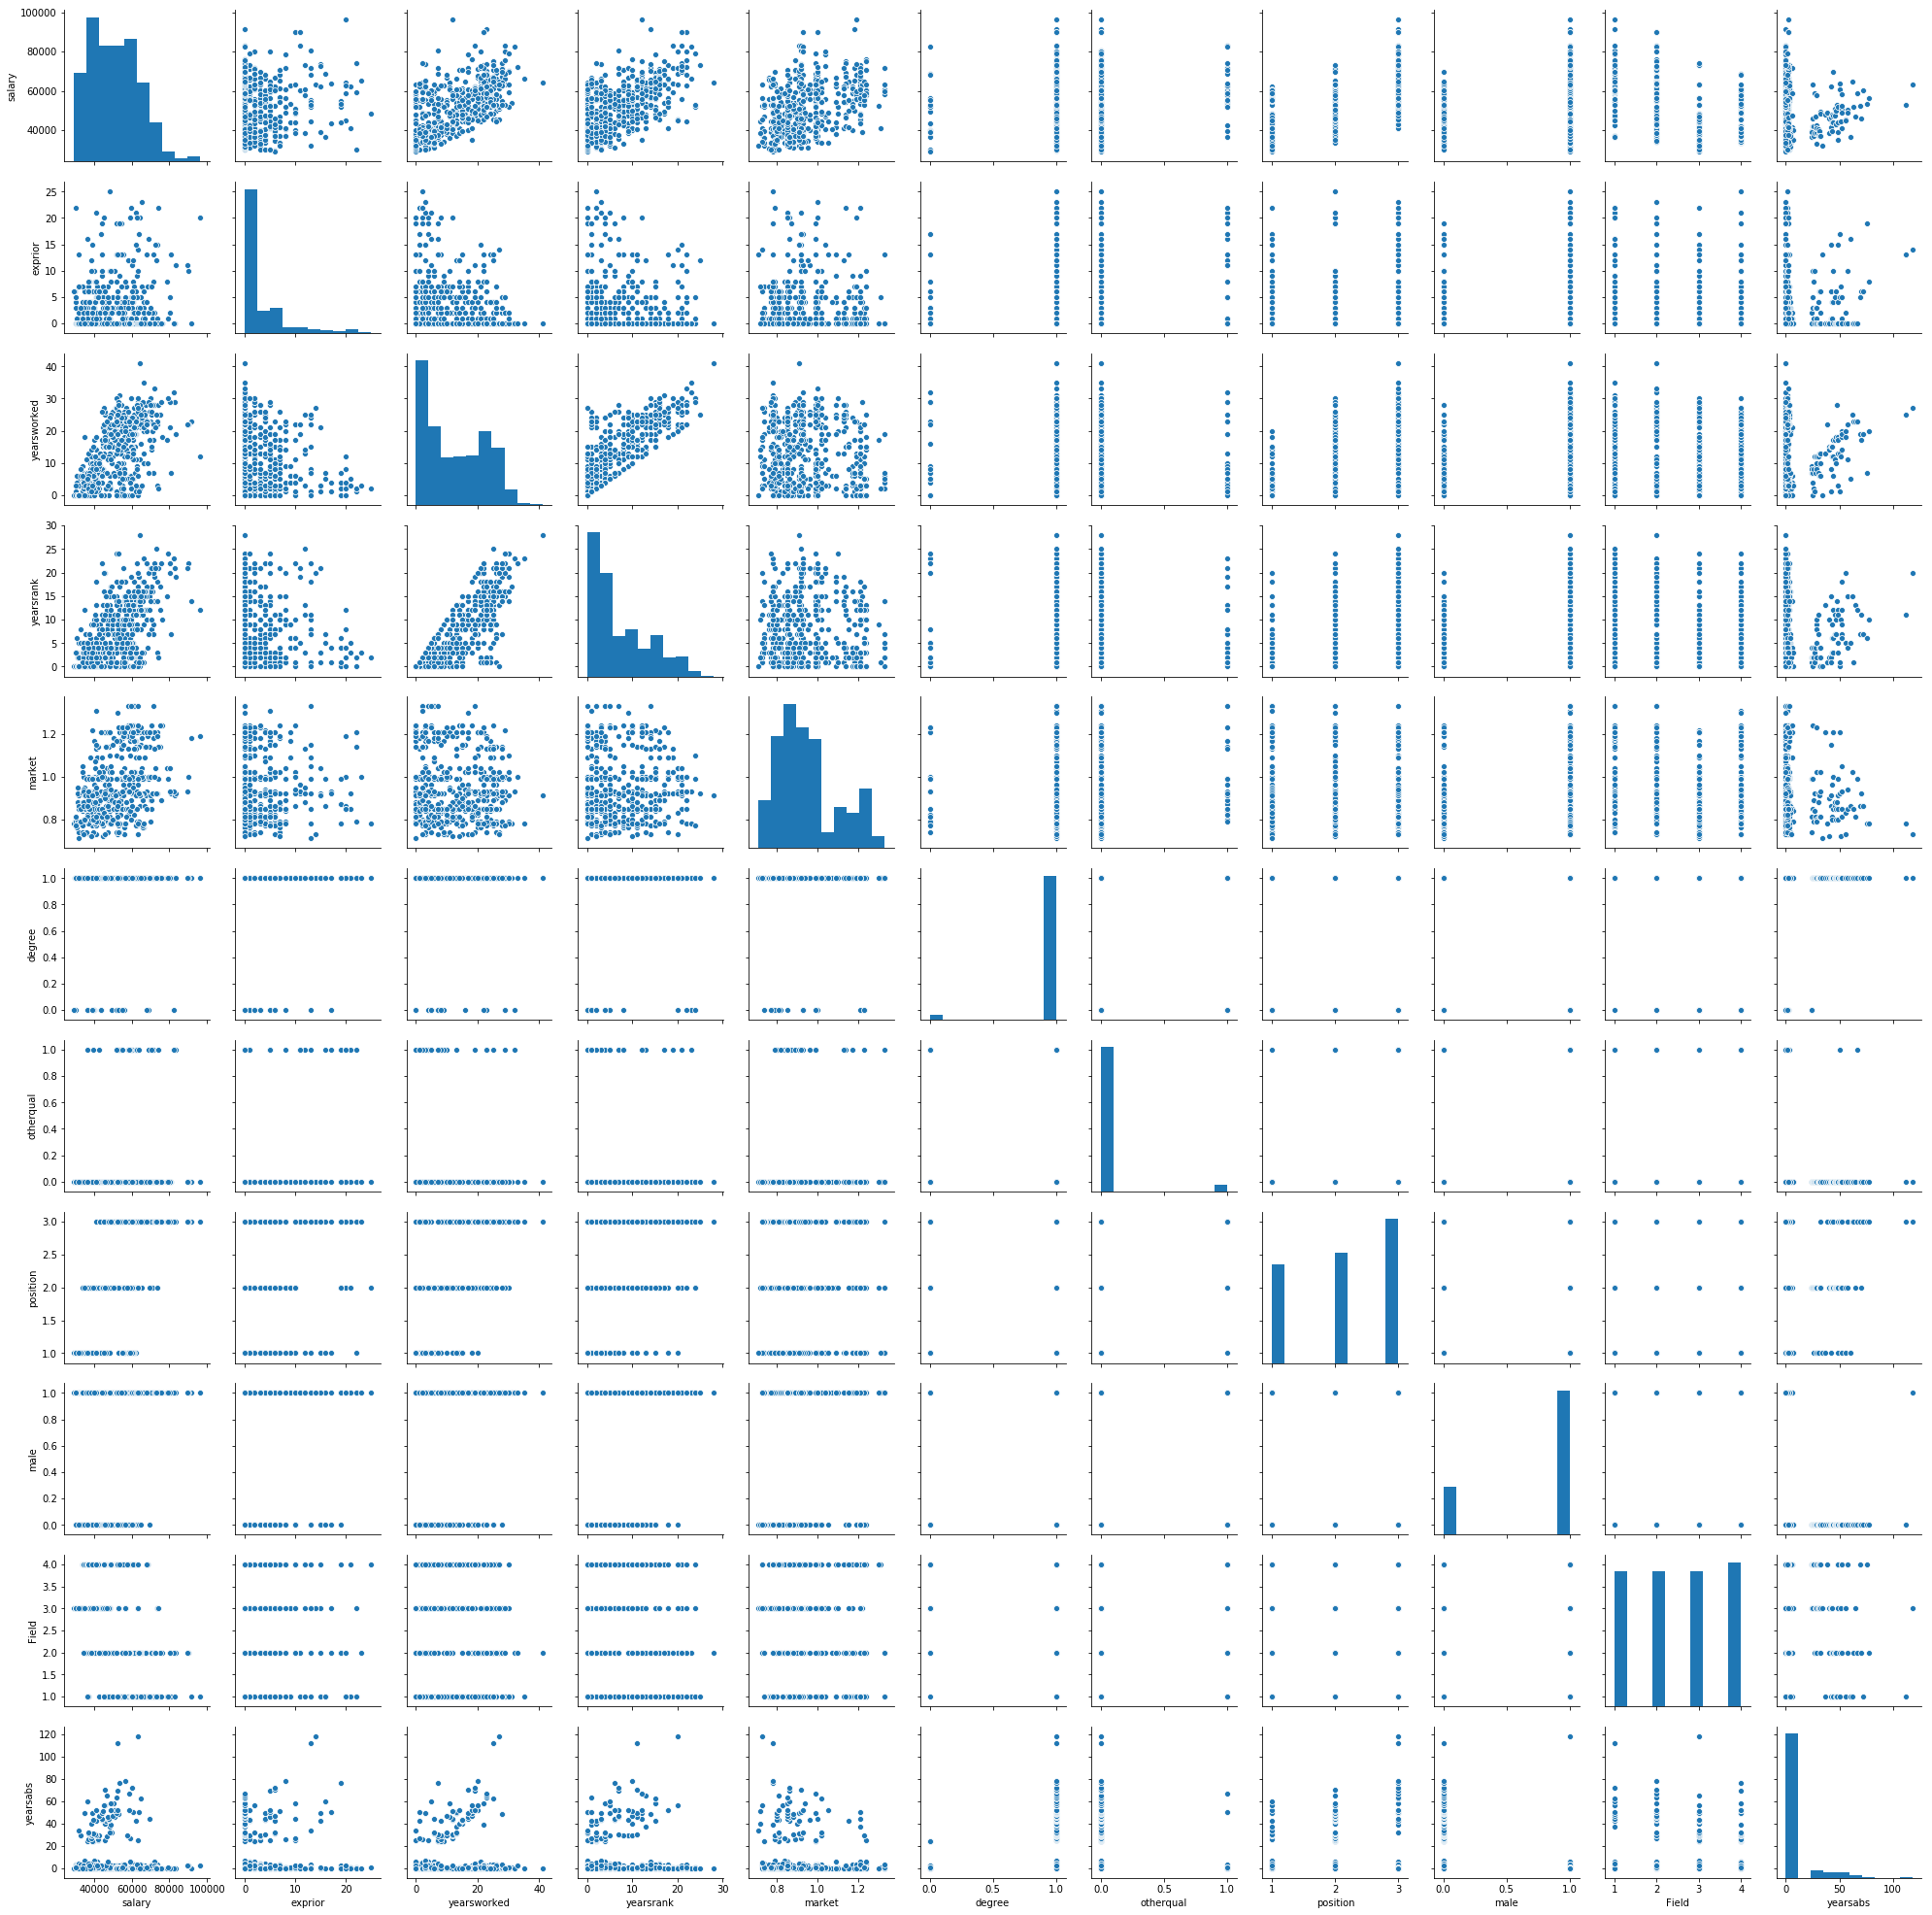

In [5]:
sns.pairplot(data)

C:\Users\Nyiko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(513, 11)

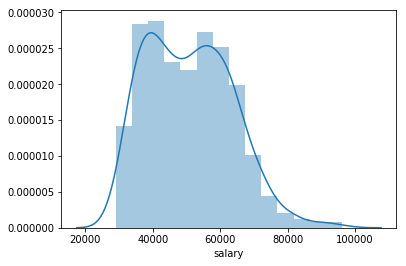

In [6]:
sns.distplot(data['salary'])
data.shape

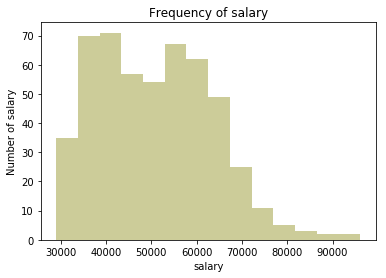

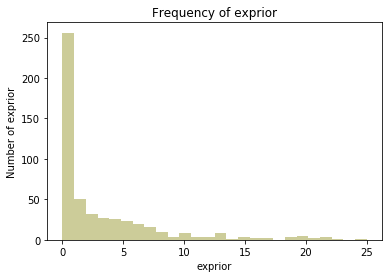

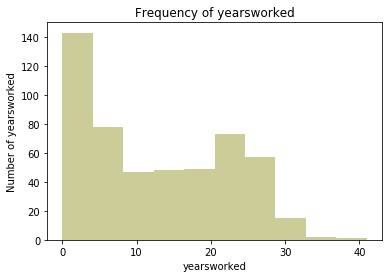

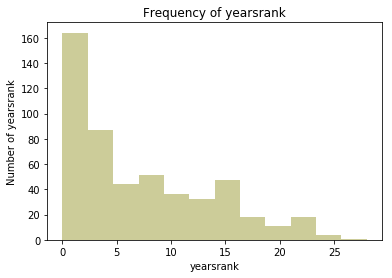

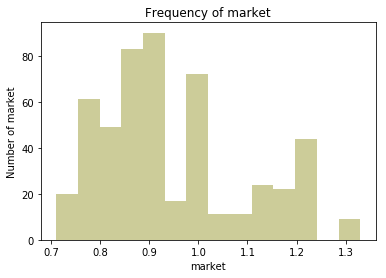

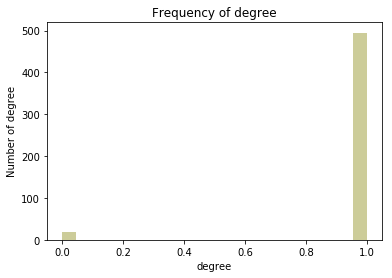

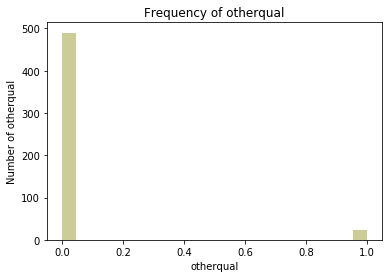

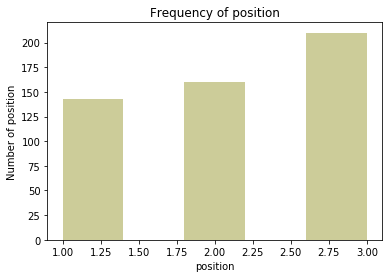

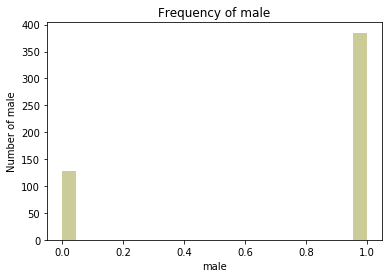

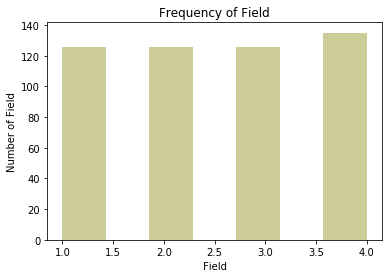

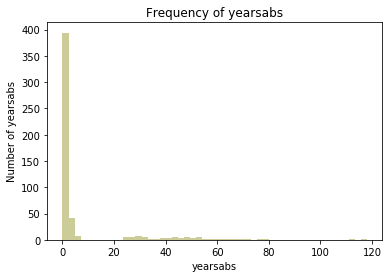

In [7]:
span = ['salary', 'exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs']
for i in span:
    sns.distplot(data[i],  kde=False,color='olive')
    plt.xlabel(f'{i}')
    plt.ylabel(f'Number of {i}')
    plt.title(f'Frequency of {i}')
    plt.show()

NameError: name 'i' is not defined

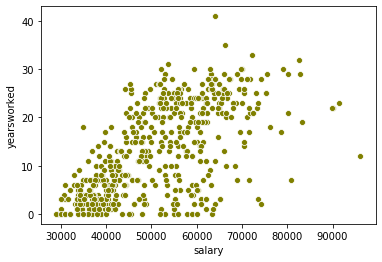

In [5]:
sns.scatterplot(data['salary'], data['yearsworked'],color='olive')
plt.xlabel(f'{i}')
plt.ylabel(f'Frequency of {i}')
plt.title('Years ')
plt.show()

In [9]:
# predict = 'salary'
# y = np.array(data[predict])
# x = np.array(data.drop([predict],1))
# x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [10]:
data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


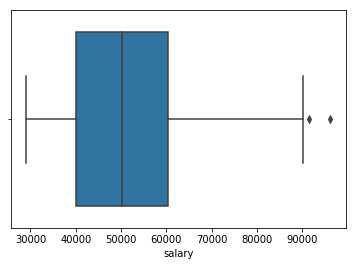

In [11]:
sns.boxplot(x=data["salary"])

In [12]:
x = data[['exprior', 'yearsworked', 'yearsrank', 'market', 'degree',
       'otherqual', 'position', 'male', 'Field', 'yearsabs']]
#x = data[['exprior', 'yearsworked', 'yearsrank', 'market','yearsabs']]
y = data['salary']
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.2)

In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(410, 10) (410,)
(103, 10) (103,)


In [14]:
linear = linear_model.LinearRegression()

In [15]:
# model = linear.fit(x_train[['yearsworked']],y_train)
# predictions = linear.predict(x_test[['yearsworked']])
# #acc = linear.score(x_test,y_test)
# print(predictions[:5])
# # print(acc)
# x_test.head()
# print(type(x_test))

In [16]:
model = linear.fit(x_train,y_train)
predictions = linear.predict(x_test)
acc = linear.score(x_test,y_test)
print(predictions[:5])
print(acc)
x_test.head()
print(type(x_test))
#actual_predict =  linear.predict([[12]])
#print(actual_predict)

[46994.72811858 55081.59256825 64691.24248071 33722.13582429
 56199.0946986 ]
0.7595790267384014
<class 'pandas.core.frame.DataFrame'>


C:\Users\Nyiko\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


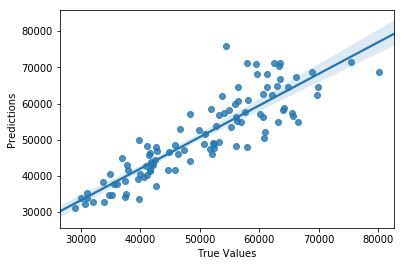

In [17]:
sns.regplot(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [18]:
# print('Score:', model.score(x_test[['yearsworked']], y_test))

In [19]:
#print('Score:', model.score(x_test, y_test))

In [20]:
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, predictions)))

MAE: 4336.924311043526
MSE: 31678490.981902618
RMSE: 5628.3648586336885


In [21]:
coeff_df = pd.DataFrame(linear.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
exprior,241.579437
yearsworked,-84.467918
yearsrank,799.984448
market,33266.349459
degree,1020.857985
otherqual,2956.230620
position,7843.627734
male,-466.660288
Field,-1836.212689
yearsabs,-58.117661


# This is question 2

In [6]:
x2 = data[['yearsworked']]
#x = data[['exprior', 'yearsworked', 'yearsrank', 'market','yearsabs']]
y2 = data['salary']
x_train2,x_test2,y_train2,y_test2 = sklearn.model_selection.train_test_split(x2,y2,test_size=0.2)

In [7]:
linear2 = linear_model.LinearRegression()
model2 = linear2.fit(x_train2,y_train2)
predictions2 = linear2.predict(x_test2)
acc2 = linear2.score(x_test2,y_test2)
print(acc2)

0.23798067803849907


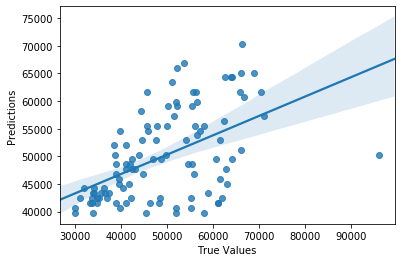

In [8]:
sns.regplot(y_test2, predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [9]:
coeff_df = pd.DataFrame(linear2.coef_,x2.columns,columns=['Coefficient'])
coeff_df

,Coefficient
yearsworked,873.465743


In [10]:
actual_predict =  linear2.predict([[12]])
print(actual_predict)
actual_predict =  linear2.predict([[80]])
print(actual_predict)

[50299.06884018]
[109694.73934045]


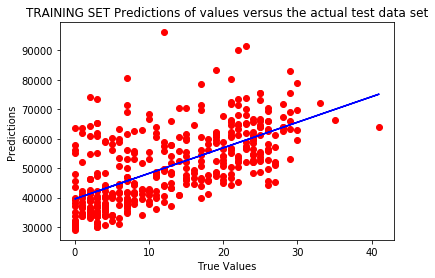

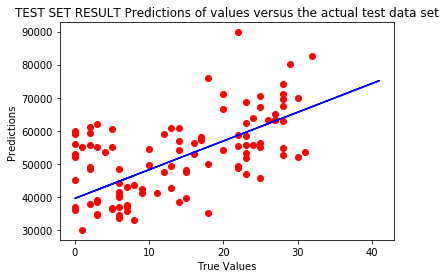

In [41]:
predictions = linear2.predict(x_test2)
plt.scatter(x_train2,y_train2,color='red')
plt.plot(x_train2,linear2.predict(x_train2),color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('TRAINING SET Predictions of values versus the actual test data set')
plt.show()

plt.scatter(x_test2,y_test2,color='red')
plt.plot(x_train2,linear2.predict(x_train2),color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('TEST SET RESULT Predictions of values versus the actual test data set')
plt.show()

#### TRAINING SET - the red are the real values , straight from the training set, the blue is the predictions . its he best line after learning . from the first one we can see that most of the data is missed and the coeff is way to far from the line of best fit from training , 

#### TEST SET - the red are the test results this time from the x test no longer from the original data . This is what it hasnt learned as we can see the model is still weak as most of the point are far from the line of best fit created by the model. Though as few the line actually predicts well .

### A low r squared score coeefff kind of proves that our model was bound to fail even though the yearsworked was a great predictor judging from the coeeff table whre a score of 0.623589. 

In [28]:
models = sm.OLS(y_train2, x_train2).fit()
predictions = models.predict(x2) 

print_model = models.summary(alpha=0.05)
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):          1.75e-128
Time:                        04:08:15   Log-Likelihood:                -4742.3
No. Observations:                 410   AIC:                             9487.
Df Residuals:                     409   BIC:                             9491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2901.1995     80.815     35.899      

In [ ]:
#pretty much any increase in years worked 

In [29]:
print('MAE:', sklearn.metrics.mean_absolute_error(y_test2, predictions))
print('MSE:', sklearn.metrics.mean_squared_error(y_test2, predictions))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test2, predictions)))
#print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_train2, predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [103, 513]

In [ ]:
# coeff_df = pd.DataFrame(linear.coef_,x2.columns,columns=['Coefficient'])
# coeff_df
linear2.coef_
#linear2.pvalues